In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import trange, tqdm
from matplotlib.ticker import AutoMinorLocator
from tools import PDF

pdf = PDF('output/analyse_desc/')

t = time.time()

In [2]:
df = pd.read_csv('data/df_train_prepro.csv').sample(frac=1)
df

,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,...,hashed_uid,hashed_xd_id,valueperclick,device_type,is_display_clicked,zonecostineuro,display_size,timestamp,hour,weekday
554847,2020-10-14,b'5IH\xefa\xd1\x01I\xfa\x91\xad\x1b\xf6\xa8go\...,b'\\_F\xe1L/\xf6:\xea\xac\x03\x01\xf5\x98\x87\...,1,app_android,1,73.0,0.0,127.0,NaN,...,b'\xc3~\xf9\x9b\x9f/6\x07\xd4\xa95\xeb\xdc\xf0...,"b""\x19%7X9OG\x9a\xce'\xd4\x11\xbc\xea\x90\xe1\...",0.139620,Android,0,0.017882,27948,2020-10-14 12:03:20,12,Wednesday
1535140,2020-10-16,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'\xef5\x9d\xc0y\x18\xa1\x8c\xa5l\xb5\r\x92-\x...,1,app_android,1,134.0,0.0,12.0,1.230719e+09,...,b'r\xba\xf6\xcc\xafu\xba\x83\xefa]\xda\xb0qI5\...,b'8\xdb*\xe6\x04\rb\xff\x16hp\xbe\'(\x8f\xb5\x...,0.087823,Android,0,0.085485,0,2020-10-16 07:00:00,7,Friday
655829,2020-10-17,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'\x9e\xdf\xa2\xa4\x19\xbb\t\x19n\xa8\xaca\xac...,6,web,1,73.0,2.0,127.0,1.957029e+09,...,"b'~\x92\x9c""\x92\x031\x86\x0c\xac\xe55\x80~\x9...",b'\xce\xbdJ\xf2\xc1V\x8d\xb3\x88\x00\x9a\xad\x...,0.120482,Android,0,0.919436,75000,2020-10-17 13:01:00,13,Saturday
1141747,2020-10-14,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'\x9e\xdf\xa2\xa4\x19\xbb\t\x19n\xa8\xaca\xac...,3,web,1,4.0,2.0,22.0,3.329165e+08,...,b'\x03n\xae\xab\xa8\xf5\x13\x11}\xa6\xc7\x9e\x...,b'\x03n\xae\xab\xa8\xf5\x13\x11}\xa6\xc7\x9e\x...,0.119699,Desktop,0,0.010000,180000,2020-10-14 11:58:00,11,Wednesday
1189639,2020-10-16,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,1,web,1,73.0,0.0,127.0,6.944641e+08,...,b'U\xb9\x8c\xb8xJ\x8aV\xfe\xb1\x92\xd1\x9b\x8f...,b'\x96R\xear*\xa9p6B\x8c\xda\x7fx\xdf\xaf\xc2\...,0.272761,Desktop,0,0.695185,96000,2020-10-16 07:58:20,7,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545705,2020-10-16,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,9,web,1,73.0,0.0,127.0,1.477820e+09,...,b'\r\xe6\x15@\x84\xc1uf\xb1\xf7\xebAGL\xe0\x7f...,b'\x14\x91\xd2\xa8\xc4\xbc\xc4\x92\xb6\xe7)P7\...,0.272761,Desktop,0,0.802886,65520,2020-10-16 09:31:20,9,Friday
862825,2020-10-15,b'5IH\xefa\xd1\x01I\xfa\x91\xad\x1b\xf6\xa8go\...,b'|\xc9\x17R$I\xfb\xc76\x8c3}3^a\x99yaM\x1c\x9...,9,app_android,1,30.0,0.0,127.0,1.293013e+09,...,"b""\xf8}\xb4$\xbbM\x088\xfd\xeaz~\x83(\xee\xb7\...",b'\xe6\xb3\xdb\xba\xa6\x8f\xcb\x9d\x9cD\x06\xe...,0.246964,Android,0,1.180000,75000,2020-10-15 14:20:30,14,Thursday
192735,2020-10-19,b'5IH\xefa\xd1\x01I\xfa\x91\xad\x1b\xf6\xa8go\...,b'\\_F\xe1L/\xf6:\xea\xac\x03\x01\xf5\x98\x87\...,1,web,1,4.0,2.0,9.0,1.505568e+09,...,b'\x87\x04\t\xf4\xd3\xe7\xd4)G\x1d\xbd\xb7A\xd...,b'\xdc\xf1)\x94\x9d\xbc\xfb\x8d\xb4\xf6v>X%L\x...,0.128658,Desktop,0,0.060000,75000,2020-10-19 13:02:20,13,Monday
733720,2020-10-13,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'\x9e\xdf\xa2\xa4\x19\xbb\t\x19n\xa8\xaca\xac...,6,web,1,4.0,2.0,12.0,1.293013e+09,...,b's\xc0pu\x8aO \x1d\x95t\xf3\x11\x00\xa5\x1f\x...,b'tqQ\xac\x84\x10zNJ\x9cy\xb6s\x06r\xc3\x06\xc...,0.119763,Android,0,0.262000,75000,2020-10-13 09:05:20,9,Tuesday


In [3]:
df.dtypes

day                                                object
hashed_partner_id                                  object
hashed_campaign_id                                 object
contextid                                           int64
display_env                                        object
target_env                                          int64
rtbtypeid                                         float64
rtbadvisibility                                   float64
rtb_detectedlanguage                              float64
urlhash2                                          float64
urlhash3                                          float64
urlhash4                                          float64
user_country                                       object
hashed_affiliateid                                 object
hashed_app_id                                      object
googleviewability                                 float64
googlepagevertical                                float64
campaignscenar

# Corrélations

Export PDF : output/analyse_desc/00.pdf



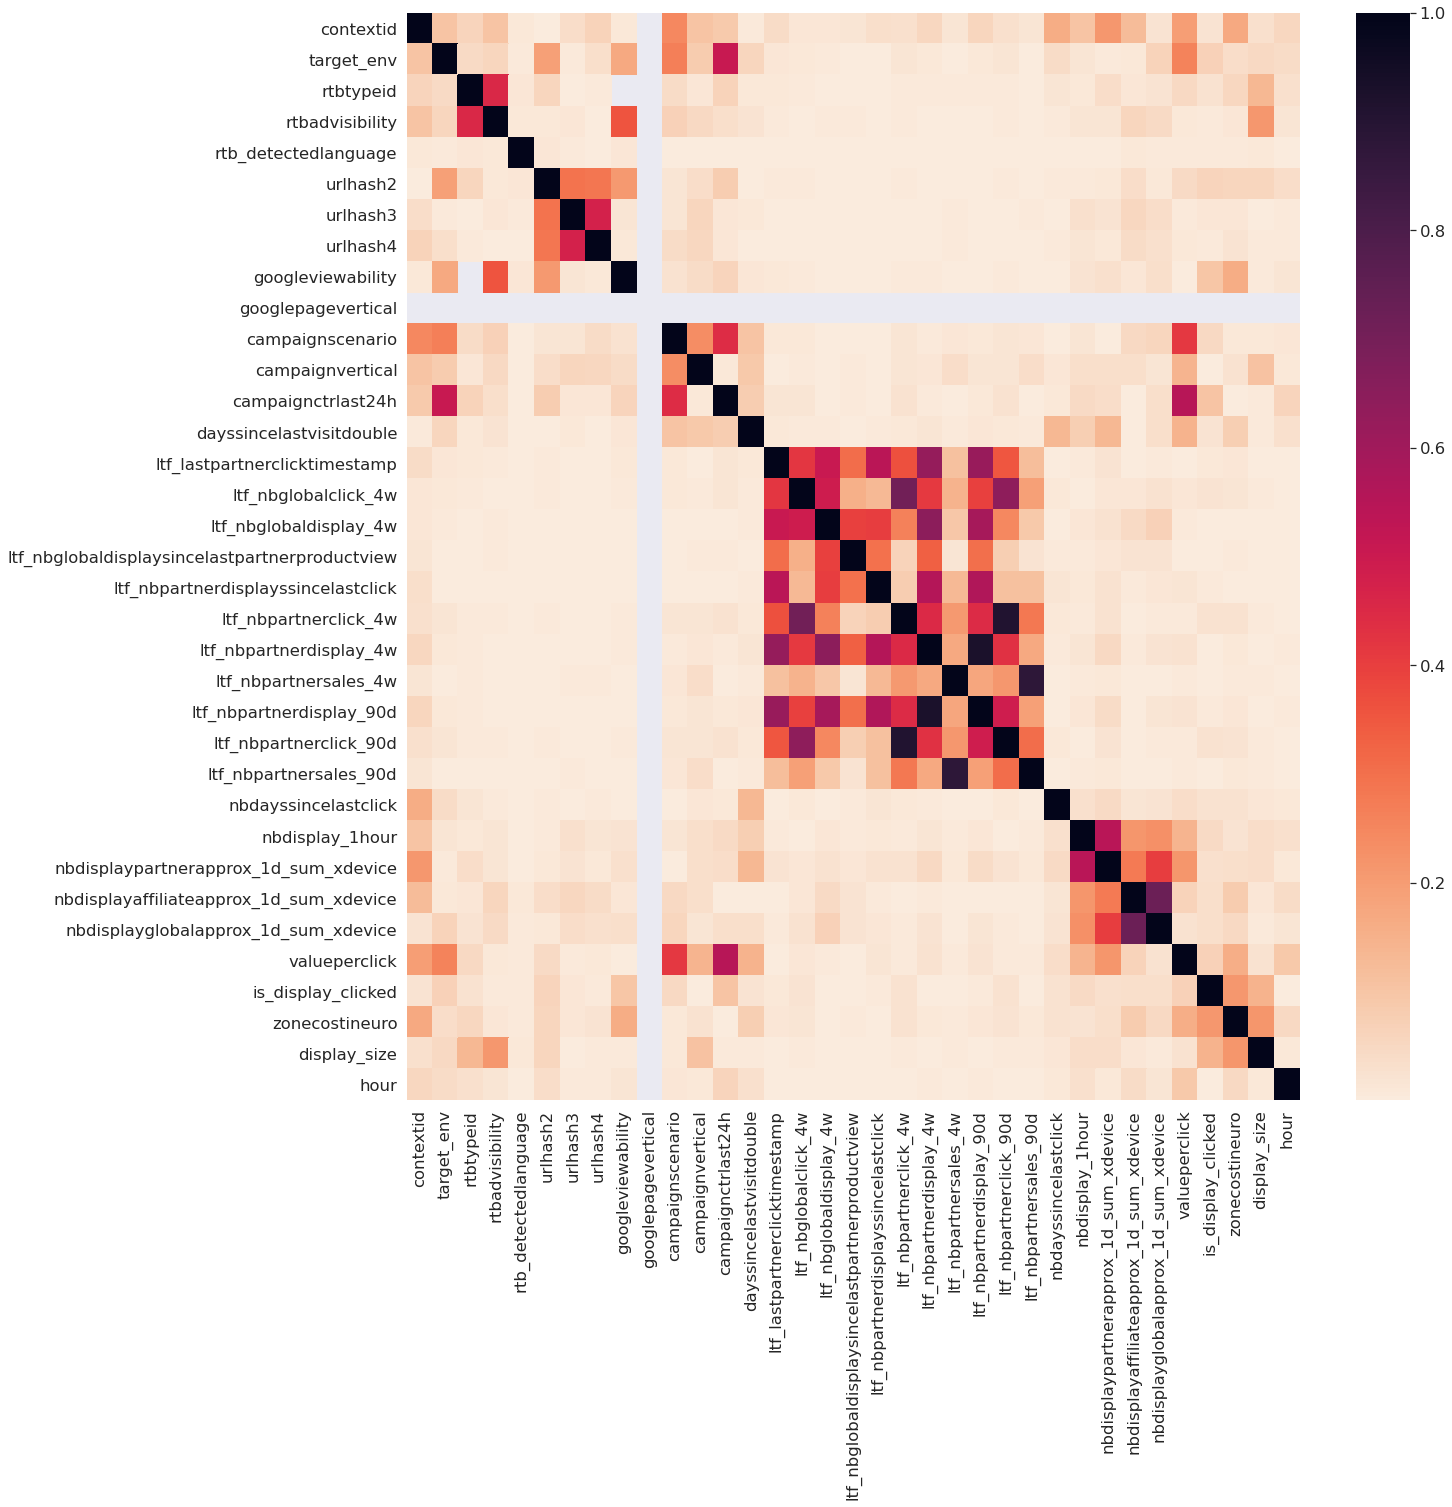

In [4]:
fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
corrMatrix = df.corr()
corrMatrix = np.abs(corrMatrix)
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
pdf.export()
plt.show()

Export PDF : output/analyse_desc/01.pdf



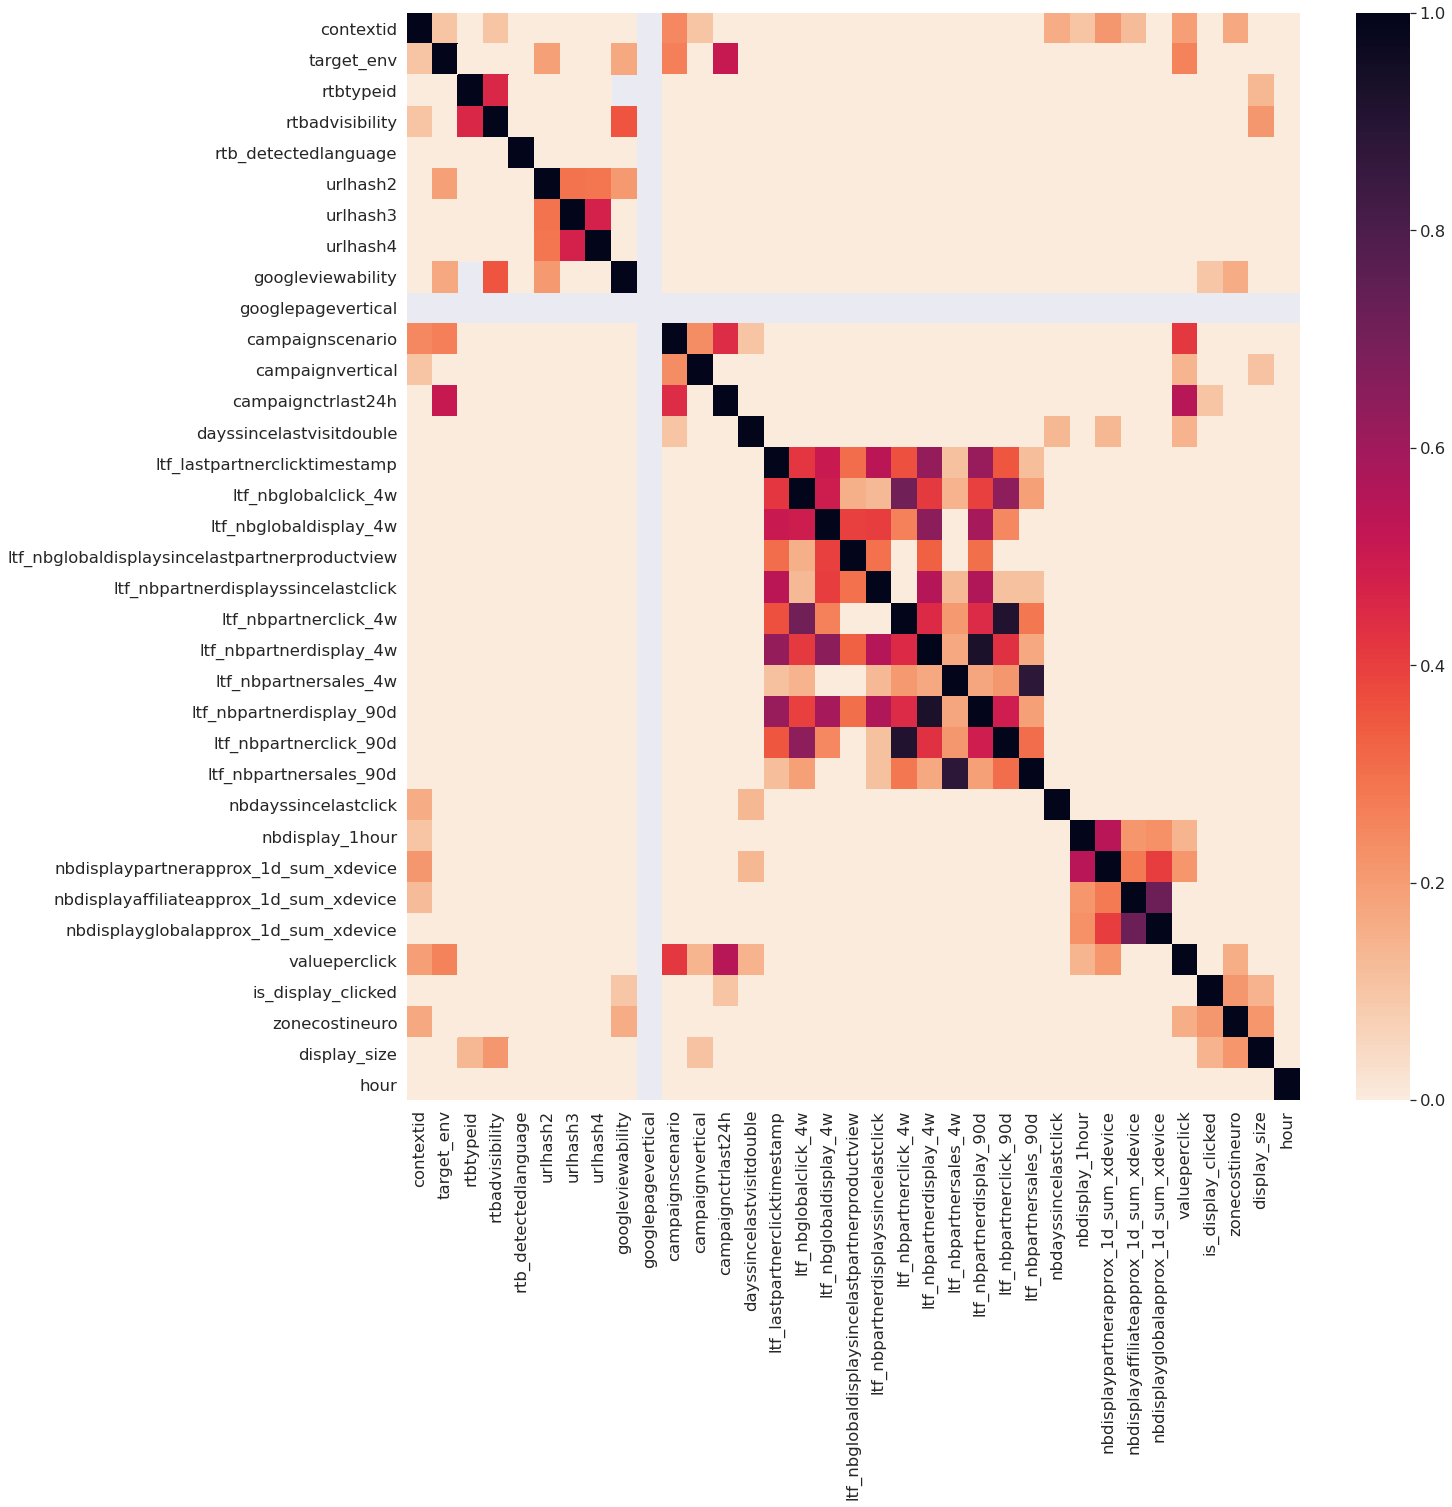

In [5]:
fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
corrMatrix = corrMatrix.applymap(lambda x : 0 if x <= 0.1 else x)
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
pdf.export()
plt.show()

# Pourcentages de clics selon les modalités de plusieurs variables explicatives

In [6]:
def to_discrete(serie, n=10, moyenne=True):
    """
    Renvoie un objet Series contenant une version discrète de la variable
    numérique 'variable' dans le data frame df.
    Cette variable discrète est constituée de dix catégories croissantes.
    """
    discrete_var = np.zeros(len(serie))
    var_min = serie.min()
    var_max = serie.max()
    pas = (var_max - var_min)/n
    for i in trange(len(serie)):
        j = -1
        while serie.iloc[i] >= var_min + (j+1)*pas:
            j += 1
        if j == n:
            j = n-1
        discrete_var[i] = var_min + (j+0.5)*pas if moyenne else j
    return discrete_var

In [7]:
def ratio_plot(variable, zoom=False, pdf=pdf, xticks=None, xticklabels=None):
    """
    Trace la proportion de clics selon la variable 'variable' dans df.
    """
    clicked = df[df['is_display_clicked'] == 1].groupby(variable).count().reindex(set(df[variable]), fill_value=0).sort_index()['is_display_clicked']
    notclicked = df[df['is_display_clicked'] == 0].groupby(variable).count().reindex(set(df[variable]), fill_value=0).sort_index()['is_display_clicked']
    ratio = clicked / (clicked + notclicked)
    
    plt.style.use('default')
    fig, ax = plt.subplots()
    ratio.plot(ax=ax, marker='o')
    plt.xticks(rotation=0)
    
    if not zoom:
        y_min, y_max = ax.get_ylim()
        y_min = 0
        ax.set_ylim(y_min, y_max)
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which='major')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)
    
    if xticks is not None:
        ax.set_xticks(xticks)
    if xticklabels is not None:
        ax.set_xticklabels(xticklabels)
    
    ax.set_title(f"Proportion de clics en fonction de {variable}")
    ax.set_xlabel(f"{variable}")
    ax.set_ylabel('Nb de clics/ (nb de clics + nb de non clics)') 
    
    if pdf:
        pdf.export()
    plt.show()
    plt.style.use('default')

In [8]:
def ratios_plot(variables, pdf=pdf):
    """
    Trace sur un même graphique les proportion de clics selon les variables de
    la liste 'variables' dans df.
    """
    ratios = []
    mini = float('inf')
    maxi = - float('inf')
    for variable in variables:
        clicked = df[df['is_display_clicked'] == 1].groupby(variable).count().reindex(set(df[variable]), fill_value=0).sort_index()['is_display_clicked']
        notclicked = df[df['is_display_clicked'] == 0].groupby(variable).count().reindex(set(df[variable]), fill_value=0).sort_index()['is_display_clicked']
        ratio = clicked / (clicked + notclicked)
        m, M = ratio.min(), ratio.max()
        if m < mini:
            mini = m
        if M > maxi:
            maxi = M
        ratios.append(ratio)
    
    plt.style.use('default')
    fig, ax = plt.subplots()
    plt.xticks(rotation=0)
    
    ax.set_ylim(mini - 0.05*(maxi-mini), maxi + 0.05*(maxi-mini))
    
    for i, ratio in enumerate(ratios):
        ratio.plot(ax=ax, label=variables[i], marker='x', legend=True)
    
    ax.grid(which='major')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)
    
    ax.set_title("Proportion de clics en fonction des variables")
    ax.set_xlabel("Modalités croissantes des variables")
    ax.set_ylabel('Nb de clics/ (nb de clics + nb de non clics)') 
    
    if pdf:
        pdf.export()
    plt.show()

In [9]:
def stacked_barplot(variable, pdf=pdf):
    clicked = df[df['is_display_clicked'] == 1].groupby(variable).count().reindex(set(df[variable]), fill_value=0).sort_index()['is_display_clicked']
    notclicked = df[df['is_display_clicked'] == 0].groupby(variable).count().reindex(set(df[variable]), fill_value=0).sort_index()['is_display_clicked']
    total = df.groupby(variable).count()['is_display_clicked']
    clicked = clicked / total * 100
    notclicked = notclicked / total * 100

    r = list(range(len(clicked)))

    # plot
    plt.style.use('default')
    fig, ax = plt.subplots()
    barWidth = 0.85
    names = clicked.index
    # Create orange Bars
    ax.bar(r, list(notclicked), width=barWidth, label="no click")
    # # Create blue Bars
    ax.bar(r, list(clicked), bottom=list(notclicked), width=barWidth, label='click')
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which='major', axis='y')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)

    plt.legend()
    # Custom x axis
    plt.xticks(r, names)
    plt.xlabel(variable)
    plt.ylabel('Répartition des clics')

    # Show graphic
    if pdf:
        pdf.export()
    plt.show()
    plt.style.use('default')

Export PDF : output/analyse_desc/02.pdf



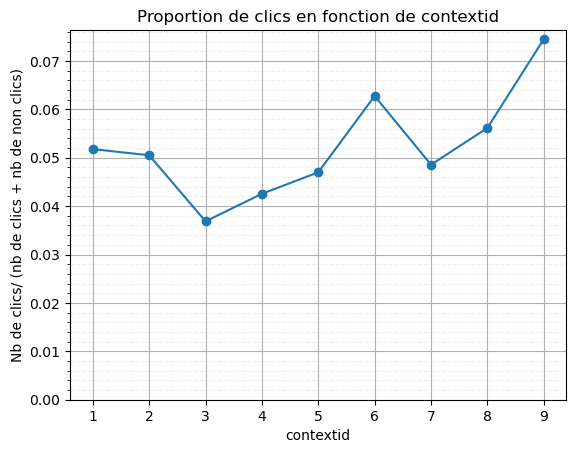

In [10]:
ratio_plot("contextid")

Export PDF : output/analyse_desc/03.pdf



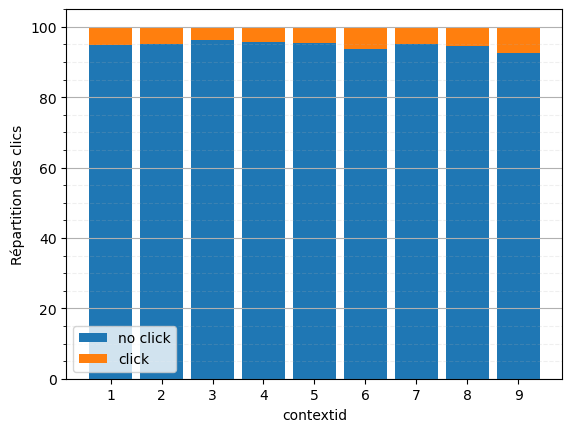

In [11]:
stacked_barplot('contextid')

  0%|          | 0/1610494 [00:00<?, ?it/s]

Export PDF : output/analyse_desc/04.pdf



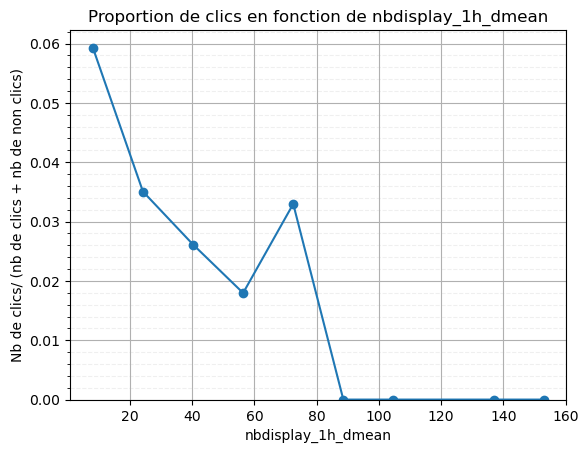

CPU times: user 29.6 s, sys: 883 ms, total: 30.5 s
Wall time: 30.2 s


In [12]:
%%time
df["nbdisplay_1h_dmean"] = to_discrete(df["nbdisplay_1hour"], moyenne=True)
ratio_plot("nbdisplay_1h_dmean")

  0%|          | 0/1610494 [00:00<?, ?it/s]

Export PDF : output/analyse_desc/05.pdf



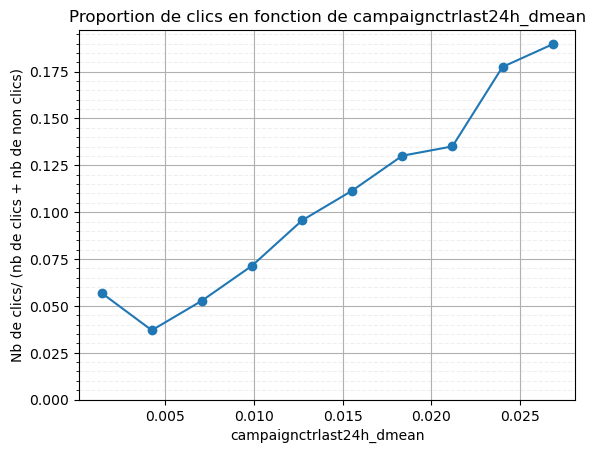

CPU times: user 52.7 s, sys: 1.12 s, total: 53.8 s
Wall time: 53.5 s


In [13]:
%%time
df["campaignctrlast24h_dmean"] = to_discrete(df["campaignctrlast24h"], moyenne=True)
ratio_plot("campaignctrlast24h_dmean")

  0%|          | 0/1610494 [00:00<?, ?it/s]

Export PDF : output/analyse_desc/06.pdf



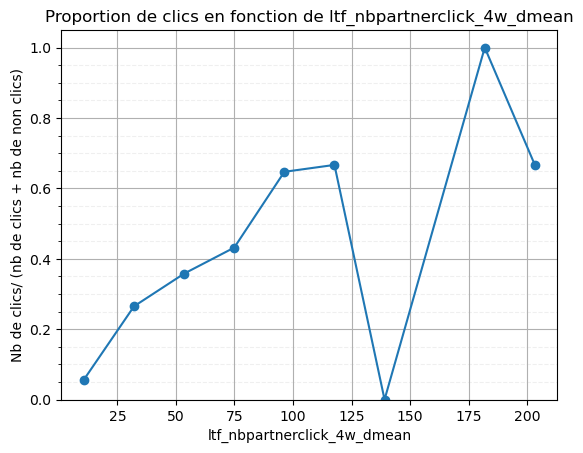

In [14]:
df["ltf_nbpartnerclick_4w_dmean"] = to_discrete(df["ltf_nbpartnerclick_4w"], moyenne=True)
ratio_plot("ltf_nbpartnerclick_4w_dmean")

  0%|          | 0/1610494 [00:00<?, ?it/s]

Export PDF : output/analyse_desc/07.pdf



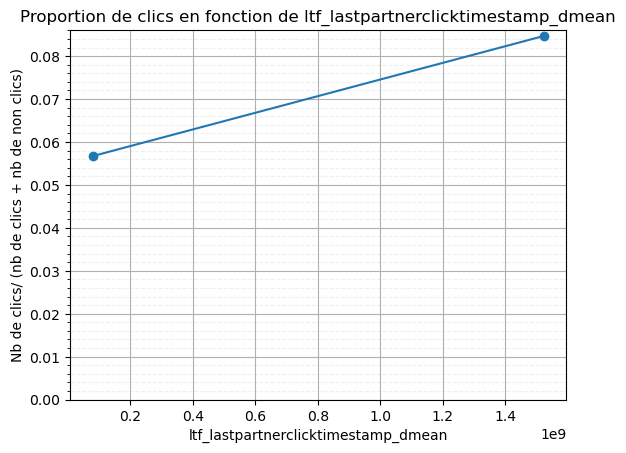

In [15]:
df["ltf_lastpartnerclicktimestamp_dmean"] = to_discrete(df["ltf_lastpartnerclicktimestamp"], moyenne=True)
ratio_plot("ltf_lastpartnerclicktimestamp_dmean")

  0%|          | 0/1610494 [00:00<?, ?it/s]

Export PDF : output/analyse_desc/08.pdf



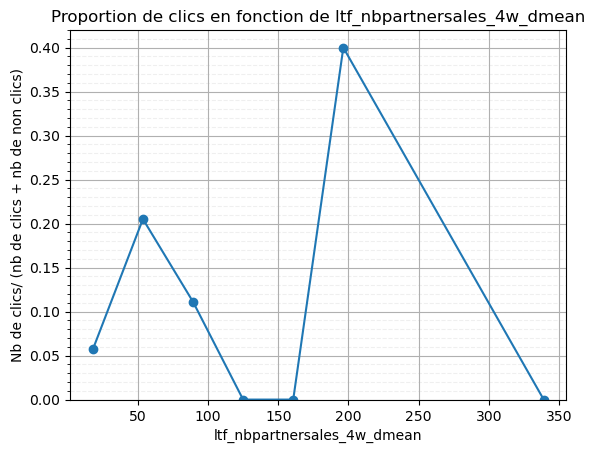

In [16]:
df["ltf_nbpartnersales_4w_dmean"] = to_discrete(df["ltf_nbpartnersales_4w"], moyenne=True)
ratio_plot("ltf_nbpartnersales_4w_dmean")

  0%|          | 0/1610494 [00:00<?, ?it/s]

Export PDF : output/analyse_desc/09.pdf



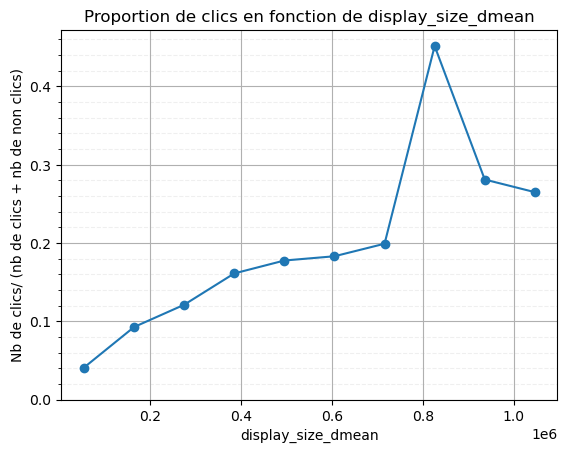

In [17]:
df["display_size_dmean"] = to_discrete(df["display_size"], moyenne=True)
ratio_plot("display_size_dmean")

In [18]:
%%time
df["campaignctrlast24h_d"] = to_discrete(df["campaignctrlast24h"], moyenne=False)
df['dayssincelastvisitdouble_d'] = to_discrete(df["dayssincelastvisitdouble"], moyenne=False)
df["ltf_lastpartnerclicktimestamp_d"] = to_discrete(df["ltf_lastpartnerclicktimestamp"], moyenne=False)
df["ltf_nbpartnersales_4w_d"] = to_discrete(df["ltf_nbpartnersales_4w"], moyenne=False)
df["nbdayssincelastclick_d"] = to_discrete(df["nbdayssincelastclick"], moyenne=False)
df["nbdisplay_1hour_d"] = to_discrete(df["nbdisplay_1hour"], moyenne=False)
df["valueperclick_d"] = to_discrete(df["valueperclick"], moyenne=False)
df["zonecostineuro_d"] = to_discrete(df["zonecostineuro"], moyenne=False)
df["display_size_d"] = to_discrete(df["display_size"], moyenne=False)

  0%|          | 0/1610494 [00:00<?, ?it/s]

  0%|          | 0/1610494 [00:00<?, ?it/s]

  0%|          | 0/1610494 [00:00<?, ?it/s]

  0%|          | 0/1610494 [00:00<?, ?it/s]

  0%|          | 0/1610494 [00:00<?, ?it/s]

  0%|          | 0/1610494 [00:00<?, ?it/s]

  0%|          | 0/1610494 [00:00<?, ?it/s]

  0%|          | 0/1610494 [00:00<?, ?it/s]

  0%|          | 0/1610494 [00:00<?, ?it/s]

CPU times: user 5min 20s, sys: 2.9 s, total: 5min 23s
Wall time: 5min 20s


Export PDF : output/analyse_desc/10.pdf



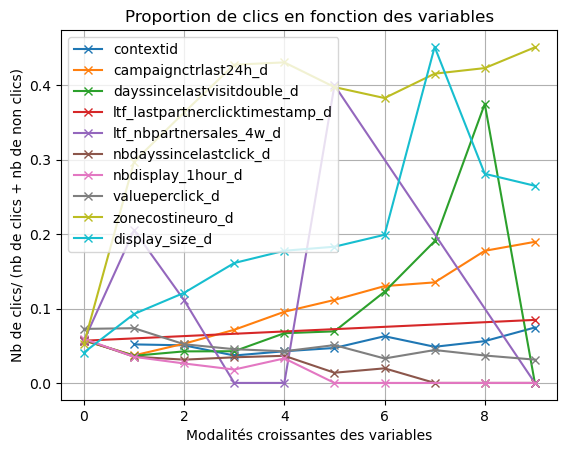

In [19]:
ratios_plot(['contextid', 
             'campaignctrlast24h_d', 
             'dayssincelastvisitdouble_d', 
             'ltf_lastpartnerclicktimestamp_d', 
             'ltf_nbpartnersales_4w_d', 
             'nbdayssincelastclick_d', 
             'nbdisplay_1hour_d', 
             'valueperclick_d', 
             'zonecostineuro_d', 
             'display_size_d'])

In [20]:
d = df[['is_display_clicked', 'hashed_uid', 'contextid']].groupby(['hashed_uid']).sum()
d.sort_values('is_display_clicked', ascending=False, inplace=True)
d['user_apperances'] = df['hashed_uid'].value_counts()
d['contextid_weighted'] = d['contextid'] / d['user_apperances']

Export PDF : output/analyse_desc/11.pdf



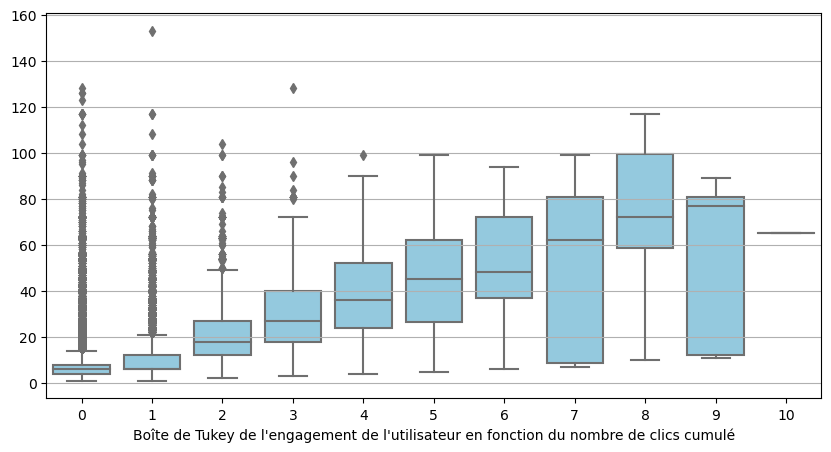

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('default')
sns.boxplot(x="is_display_clicked", y="contextid", data=d, ax=ax, color="skyblue")
ax.set_xlabel("Boîte de Tukey de l'engagement de l'utilisateur en fonction du nombre de clics cumulé")
ax.set_ylabel('')
ax.grid(axis='y')
pdf.export()
plt.show()
plt.style.use('default')

Export PDF : output/analyse_desc/12.pdf



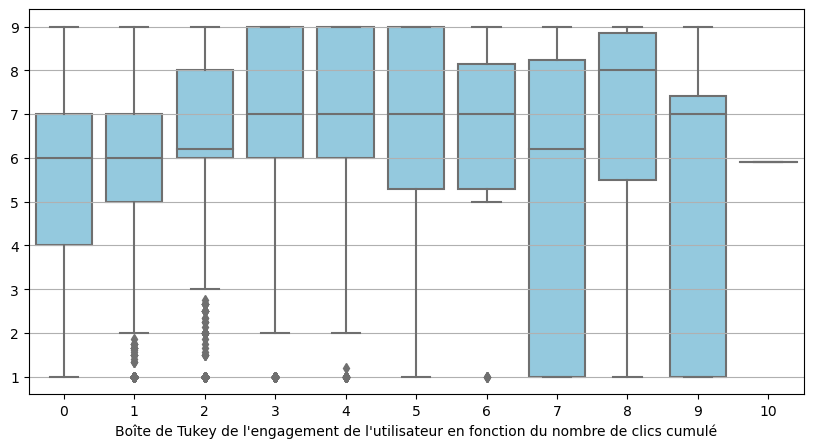

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('default')
sns.boxplot(x="is_display_clicked", y="contextid_weighted", data=d, ax=ax, color="skyblue")
ax.set_xlabel("Boîte de Tukey de l'engagement de l'utilisateur en fonction du nombre de clics cumulé")
ax.set_ylabel('')
ax.grid(axis='y')
pdf.export()
plt.show()
plt.style.use('default')

## Répartition du nombre de clics

Export PDF : output/analyse_desc/13.pdf



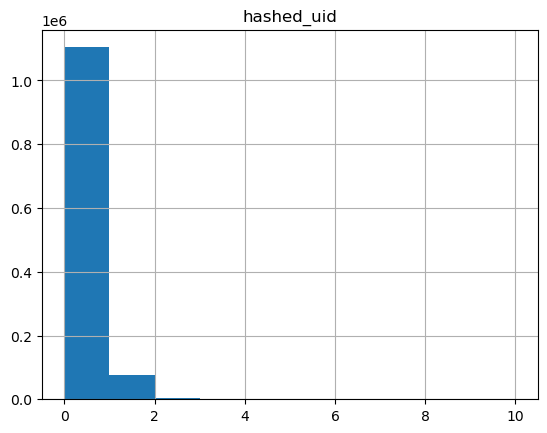

In [23]:
a = df[['is_display_clicked', 'hashed_uid']].groupby(['hashed_uid']).sum()
a[(a.is_display_clicked < 20)].hist()
plt.title("hashed_uid")
pdf.export()
plt.show()

Export PDF : output/analyse_desc/14.pdf



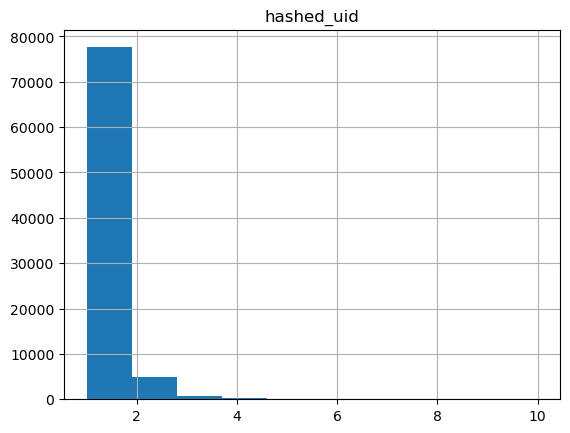

In [24]:
a[(a.is_display_clicked > 0) & (a.is_display_clicked < 20)].hist()
plt.title("hashed_uid")
pdf.export()
plt.show()

Export PDF : output/analyse_desc/15.pdf



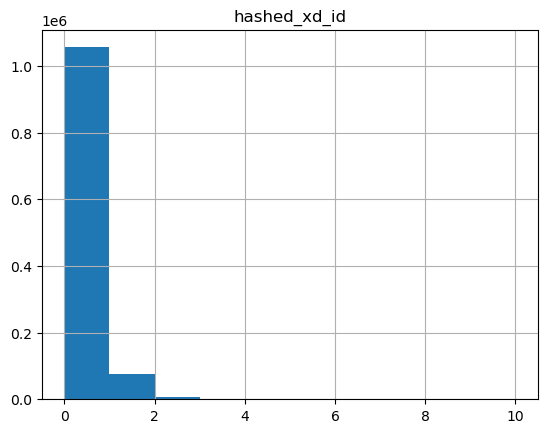

In [25]:
# `hashed_xd_id` : Hashed cross device identification number 
b = df[['is_display_clicked', 'hashed_xd_id']].groupby(['hashed_xd_id']).sum()
b[(b.is_display_clicked < 20)].hist()
plt.title("hashed_xd_id")
pdf.export()
plt.show()

Export PDF : output/analyse_desc/16.pdf



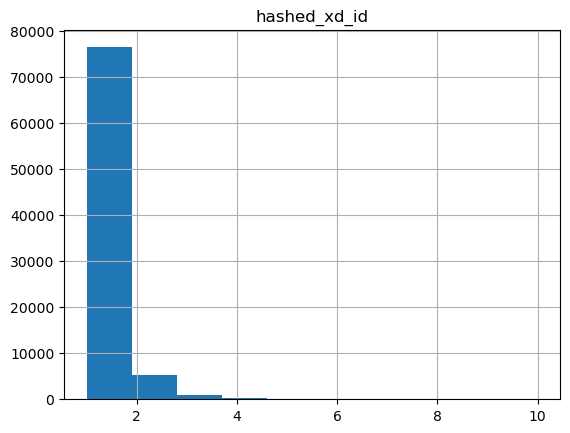

In [26]:
b[(b.is_display_clicked > 0) & (b.is_display_clicked < 20)].hist()
plt.title("hashed_xd_id")
pdf.export()
plt.show()

## Timestamp

Export PDF : output/analyse_desc/17.pdf



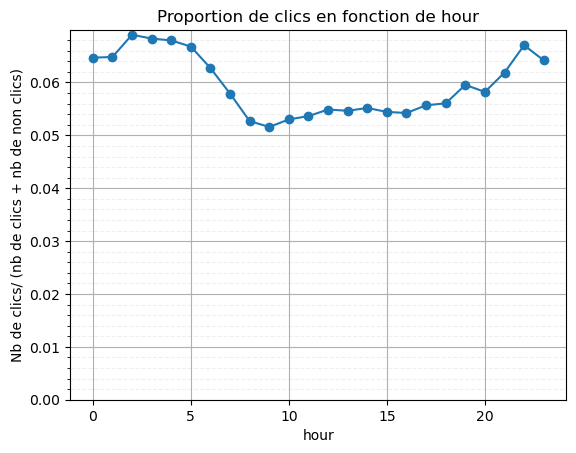

In [27]:
ratio_plot("hour")

Export PDF : output/analyse_desc/18.pdf



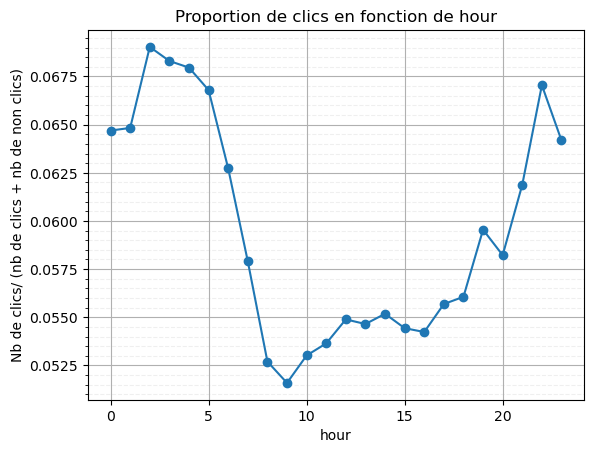

In [28]:
ratio_plot("hour", zoom=True)

In [29]:
df.head()

,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,...,display_size_dmean,campaignctrlast24h_d,dayssincelastvisitdouble_d,ltf_lastpartnerclicktimestamp_d,ltf_nbpartnersales_4w_d,nbdayssincelastclick_d,nbdisplay_1hour_d,valueperclick_d,zonecostineuro_d,display_size_d
554847,2020-10-14,b'5IH\xefa\xd1\x01I\xfa\x91\xad\x1b\xf6\xa8go\...,b'\\_F\xe1L/\xf6:\xea\xac\x03\x01\xf5\x98\x87\...,1,app_android,1,73.0,0.0,127.0,NaN,...,55080.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1535140,2020-10-16,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'\xef5\x9d\xc0y\x18\xa1\x8c\xa5l\xb5\r\x92-\x...,1,app_android,1,134.0,0.0,12.0,1.230719e+09,...,55080.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
655829,2020-10-17,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'\x9e\xdf\xa2\xa4\x19\xbb\t\x19n\xa8\xaca\xac...,6,web,1,73.0,2.0,127.0,1.957029e+09,...,55080.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1141747,2020-10-14,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'\x9e\xdf\xa2\xa4\x19\xbb\t\x19n\xa8\xaca\xac...,3,web,1,4.0,2.0,22.0,3.329165e+08,...,165240.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1189639,2020-10-16,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,1,web,1,73.0,0.0,127.0,6.944641e+08,...,55080.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


Export PDF : output/analyse_desc/19.pdf



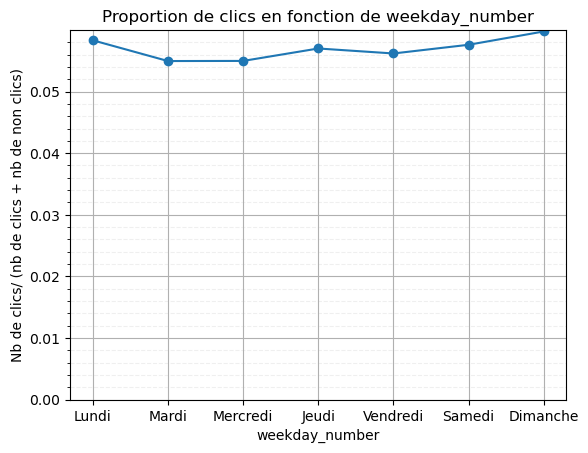

In [30]:
df['weekday_number'] = pd.to_datetime(df.timestamp).dt.weekday
xticks = [0, 1, 2, 3, 4, 5, 6]
xticklabels = ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]
ratio_plot("weekday_number", xticks=xticks, xticklabels=xticklabels)

Export PDF : output/analyse_desc/20.pdf



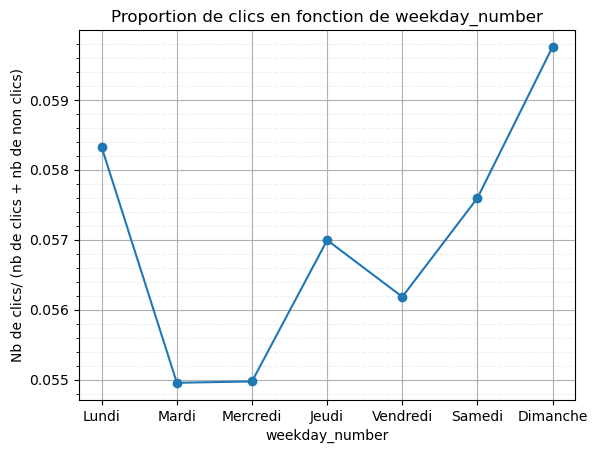

In [31]:
ratio_plot("weekday_number", zoom=True, xticks=xticks, xticklabels=xticklabels)

In [32]:
print(f"Temps d'exécution total : {time.strftime('%H:%M:%S', time.gmtime(time.time()-t))}")

Temps d'exécution total : 00:11:20
